01-3

# 01-3. 마켓과 머신러닝


생선 데이터셋  출처<br>
https://www.kaggle.com/aunpyaeap/fish-market


In [ ]:
#도미 데이터
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

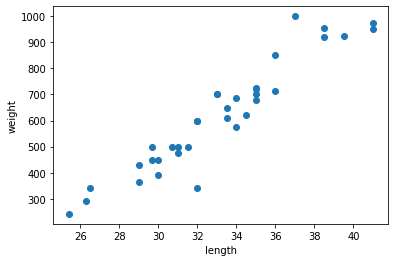

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
#빙어 데이터
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

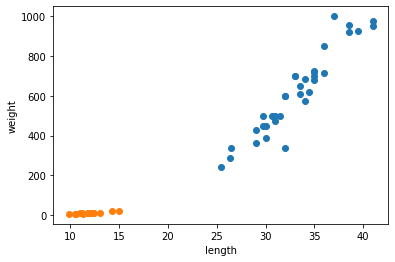

In [ ]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
# k-최근접 이웃 알고리즘
# 데이터 합치기
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

#2차원 리스트로 변환
fish_data = [[l, w] for l, w in zip(length, weight)]

print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [ ]:
#도미와 빙어 분리하기
fish_target = [1] * 35 + [0] * 14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
# 모듈 삽입
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target)
kn.score(fish_data, fish_target)

1.0

In [ ]:
# 훈련한 머신으로 예측하기
kn.predict([[30, 600]])
print(kn.predict([[15, 150]]))

# 참고데이터를 49개로 한 kn49모델
kn49 =KNeighborsClassifier(n_neighbors=49)

kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)

[0]


0.7142857142857143

# 02-1. 훈련 세트와 테스트 세트

In [ ]:
#도미와 빙어 데이터
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [ ]:
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1]*35 + [0]*14

from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

# train, test 데이터 분리
train_input = fish_data[ :35]
train_target = fish_target[ :35]
test_input = fish_data[35: ]
test_target = fish_target[35:]

# 모델링, 평가하기
kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target)

0.0

In [ ]:
import numpy as np

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

# 무작위로 섞어주기, 42는 변수
np.random.seed(42)
index = np.arange(49)
np.random.shuffle(index)

#print(index)

#무작위로 섞인 훈련 세트 만들기
train_input = input_arr[index[ :35]]
train_target = target_arr[index[ :35]]
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

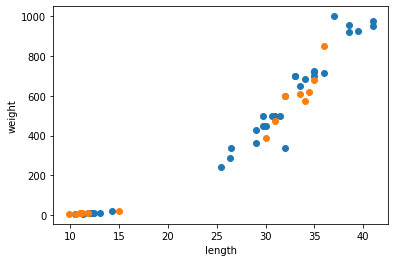

In [ ]:
#무작위로 섞인 데이터 시각화 해보기
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(test_input[:,0], test_input[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
kn = kn.fit(train_input, train_target)

kn.score(test_input, test_target)

kn.predict(test_input)


1.0


array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

#02-2. 데이터 전처리


In [ ]:
#도미와 빙어 데이터
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

column_stack() 함수<br>
* 전달받은 리스트를 일렬로 세운 다음 차례대로 나란히 연결, 연결할 리스트는 튜플(turple)로 전달 <br>

concatenate() 함수<br>
* 전달받은 리스트를 첫번째 차원에 따라 연결함<br>


In [ ]:
import numpy as np

#column_stack 함수 예시
np.column_stack(([1,2,3], [4,5,6]))


fish_data = np.column_stack((fish_length, fish_weight))
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


ones() 함수 <br>
* 원하는 개수의 1를 채운 배열 <br>

zeros() 함수<br>
* 원하는 개수의 0을 채운 배열

In [ ]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


train_test_split 사용하기 <br>
* train/test data를 무작위로 나눠줌
* parameter 설명
 * test_size - 기본은 0.25를 테스트데이터로 설정함
 * stratify - 타깃 데이터(Y값)를 입력하면 클래스 비율에 맞게 데이터를 나눔 

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target
                                                                      ,random_state = 42)
#데이터셋의 크기 확인
print(train_input.shape, test_input.shape)
print(train_target.shape, test_target.shape)

print(test_target)

(36, 2) (13, 2)
(36,) (13,)
[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
# stratify 적용
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target
                                                                      ,stratify = fish_target
                                                                      ,random_state = 42)
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
#K-최근접 이웃 훈련
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

#다시 도미와 빙어를 분류해보기
print(kn.predict([[25, 150]]))

[0.]


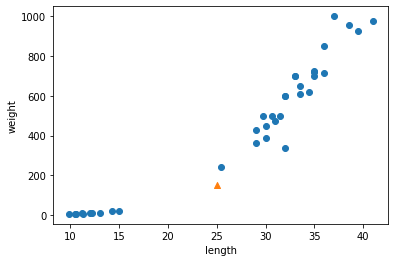

In [ ]:
#산점도
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

kneighbors() 메서드<br>
* 주어진 샘플에서 가장 가까운 이웃을 찾아주는 메서드
* 이웃까지의 거리와 이웃 샘플의 인덱스를 반환


Text(0, 0.5, 'weight')

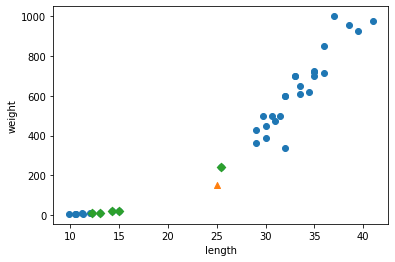

In [ ]:
# 길이 25, 무게 150의 데이터의 재검수

distances, indexes = kn.kneighbors([[25, 150]])

plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker = 'D')
plt.xlabel('length')
plt.ylabel('weight')

In [ ]:
print(train_input[indexes]) #데이터로 보기

print(train_target[indexes]) #타깃 데이터

print(distances) #거리를 조절하는 하이퍼 파라미터가 필요함

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]
[[1. 0. 0. 0. 0.]]
[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


Text(0, 0.5, 'weight')

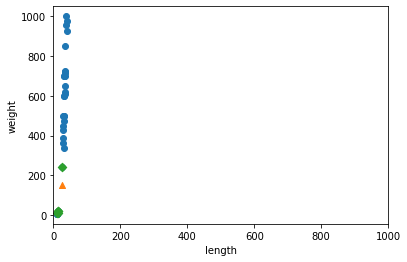

In [ ]:
# x축의 범위를 0~1000으로 맞춰 범위를 재지정

distances, indexes = kn.kneighbors([[25, 150]])

plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker = 'D')
plt.xlim(0, 1000) #축 범위가 auto가 아닌 상수로
plt.xlabel('length')
plt.ylabel('weight')

브로드캐스팅(broadcasting)<br>
* 크기가 다른 넘파이 배열에서 자동으로 사칙 연산을 모든 행이나 열로 확장하여 수행하는 기능

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


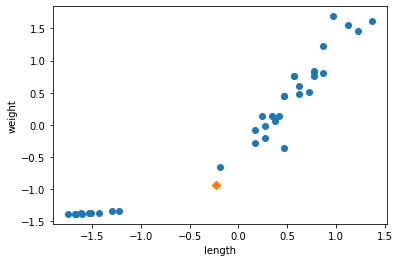

In [ ]:
#표준점수로 변환, 비교
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

print(mean, std)

#.넘파이 배열에서는 브로드캐스팅(broadcasting)
train_scaled = (train_input - mean) / std

#표준화한 값으로 그래프
plt.scatter(train_scaled[:,0], train_scaled[:,1])
#25,150도 scale을 맞춰줘야 함
new = ([25,150] - mean) / std
plt.scatter(new[0], new[1], marker= 'D')
plt.xlabel('length')
plt.ylabel('weight')

plt.show()

In [ ]:
#재학습
kn.fit(train_scaled, train_target)

# 모델 평가
test_scaled = (test_input - mean) / std
kn.score(test_scaled, test_target)

1.0

In [ ]:
# 최종 25, 150의 값을 예측해보기
print(kn.predict([new]))

[1.]


# 03-1. k-최근접 이웃 회귀

In [ ]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

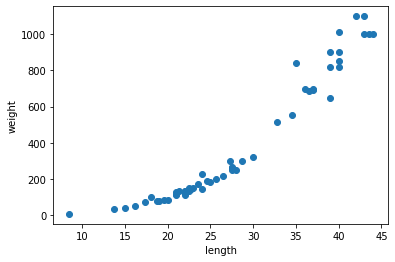

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight
                                                                    ,random_state = 42)

reshape() 메서드 <br>
* 2차원 배열로 바꿔주는 메서드
* 크기에 -1을 지정하면 나머지 원소 개수로 모두 채우는 의미
* 바꾸기 전후의 배열의 원소 개수는 같아야함

In [ ]:
# 사이킷런의 훈련세트는 2차원 배열이어야 하나, 이번 데이터셋은 1차원 배열이므로 이를 바꿔주는 함수 사용
test_array = np.array([1,2,3,4])
print(test_array.shape)

test_array = test_array.reshape(2,2)
print(test_array.shape)

(4,)
(2, 2)


In [ ]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1,1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


결정계수(R) <br>
* 회귀는 결정계수로 평가<br>

<br>
score() 메서드의 출력값의 의미<br>
* 사이킷런의 score() 메서드가 출력하는 값은 높을수록 좋은 것 <br>


In [ ]:
# k-최근접 이웃 회귀 알고리즘으로 테스트
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()

#k-최근접 이웃 회귀모델을 훈련
knr.fit(train_input, train_target)

print(knr.score(test_input, test_target))

0.992809406101064


In [ ]:
from sklearn.metrics import mean_absolute_error

# 테스트 세트에 대한 예측을 만듭니다.
test_prediction = knr.predict(test_input)

# 테스트 세트에 대한 평균 절댓값 오차를 계산합니다.
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


과대적합 vs 과소적합<br>

In [ ]:
print(knr.score(train_input, train_target))

0.9698823289099254


In [ ]:
# 이웃의 개수를 3으로 설정합니다.
knr.n_neighbors = 3

#모델의 다시 훈련합니다.
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

# 테스트세트의 점수 확인
print(knr.score(test_input, test_target))

0.9804899950518966
0.9746459963987609


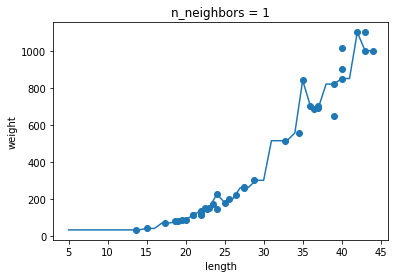

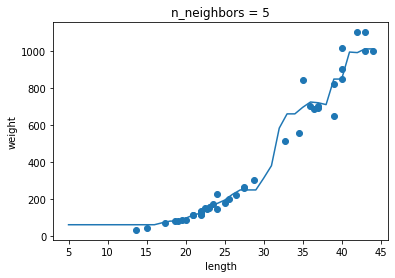

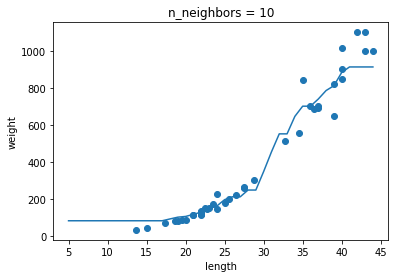

In [ ]:
#k-최근접 이웃 회귀 - k값 비교
#k-최근접 이웃 회귀 객체를 만듭니다.
import numpy as np
knr = KNeighborsRegressor()

# 5에서 45까지 x좌표를 만듭니다.
x = np.arange(5, 45).reshape(-1,1)

# n = 1, 5, 10일때 예측 결과를 그래프로 그립니다.
for n in [1, 5, 10]:
  #모델을 훈련합니다.
  knr.n_neighbors = n
  knr.fit(train_input, train_target)
  
  prediction = knr.predict(x)
  
  #훈련 세트와 예측 결과를 그래프로 그립니다.
  plt.scatter(train_input, train_target)
  plt.plot(x, prediction)
  plt.title('n_neighbors = {}'.format(n))
  plt.xlabel('length')
  plt.ylabel('weight')
  plt.show()

# 03-2. 선형회귀

In [ ]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [ ]:
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 나누기
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight
                                                                      ,random_state = 42)

#훈련 세트와 테스트 세트를 2차원 배열로 바꿉니다.
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

#k-최근접 이웃 개수를 3으로 하는 모델 훈련
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors = 3)

# k-최근접 이웃 회귀 모델 훈련합니다.
knr.fit(train_input, train_target)

print(knr.predict([[50]]))

##실제 농어의 무게는 이보다 더 나감, 어디서 문제가 발생한 것일까?

[1033.33333333]


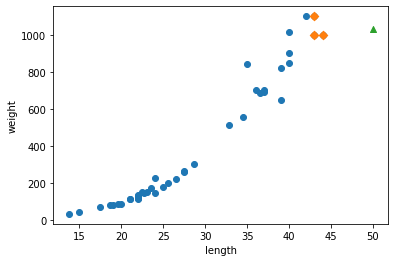

In [ ]:
import matplotlib.pyplot as plt

# 50cm 농어의 이웃을 구합니다.
distances, indexes = knr.kneighbors([[50]])

# 훈련 세트의 산점도를 그립니다.
plt.scatter(train_input, train_target)

#훈련 세트 중에서 이웃 샘플만 다시 그립니다.
plt.scatter(train_input[indexes], train_target[indexes], marker ='D')

#50cm 농어 데이터
plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


In [ ]:
# 45cm 근방의 세 개의 샘플의 무게의 평균은?
print(np.mean(train_target[indexes]))

# 그럼 100cm 농어의 무게는?
print(knr.predict([[100]]))

# 그럼 150cm 농어의 무게는?
print(knr.predict([[150]]))

# 학습데이터 이상을 예측하지 못함 -> 선형회귀의 필요성

1033.3333333333333
[1033.33333333]
[1033.33333333]


선형회귀
* 특성이 하나인 경우 어떤 직선을 학습하는 알고리즘

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# 선형 회귀 모델을 훈련합니다.
lr.fit(train_input, train_target)

#50cm 농어에 대해 예측합니다.
print(lr.predict([[50]]))

# LinearRegression 기울기와 절편 찾기
print(lr.coef_, lr.intercept_)

[1241.83860323]
[39.01714496] -709.0186449535477


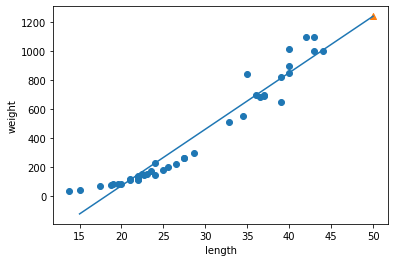

In [ ]:
# 훈련 세트의 산점도를 그립니다.
plt.scatter(train_input, train_target)

# 15에서 50까지 1차 방정식 그래프를 그립니다.
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

# 50cm 농어데이터
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
# 훈련 세트와 테스트 세트에 대한 결정계수 점수 확인
print(lr.score(train_input, train_target)) #훈련 세트
print(lr.score(test_input, test_target)) # 테스트 세트



0.939846333997604
0.8247503123313558


다항 회귀

In [ ]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [ ]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]]))

print(lr.coef_, lr.intercept_)

[1573.98423528]
[  1.01433211 -21.55792498] 116.0502107827827


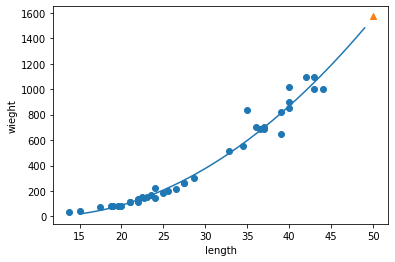

In [ ]:
#구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 만듭니다.
point = np.arange(15, 50)

#훈련 세트의 산점도를 그립니다.
plt.scatter(train_input, train_target)

#15에서 49까지 2차 방정식 그래프를 그립니다.
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)

# 50cm 농어 데이터
plt.scatter(50, 1574, marker='^')
plt.xlabel('length')
plt.ylabel('wieght')
plt.show()

In [ ]:
# 훈련 세트와 테스트 세트의 결정계수 점수 평가

print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122


# 03-3. 특성 공학과 규제


In [ ]:
#pandas 활용하기
import pandas as pd
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [ ]:
import numpy as np
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight,
                                                                      random_state=42)


In [ ]:
#사이킷런 변환기
from sklearn.preprocessing import PolynomialFeatures

# 샘플 적용해보기
poly = PolynomialFeatures()
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

# 선형 방정식의 절편을 항상 값이 1인 특성과 곱해지는 계수 -> 사이킷런 선형 모델에서는 굳이 필요없음

[[1. 2. 3. 4. 6. 9.]]


In [ ]:
# include_bias=False
# 사이킷런에서는 자동으로 특성에 추가된 절편항을 무시하나, 여기서는 혼돈을 피하기 위해 명시적으로 지정
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[2. 3. 4. 6. 9.]]


In [ ]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

(42, 9)


In [ ]:
#PolynimialFeatures의 특성 확인하기
poly.get_feature_names()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0',
 'x1',
 'x2',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x1^2',
 'x1 x2',
 'x2^2',
 'x0^3',
 'x0^2 x1',
 'x0^2 x2',
 'x0 x1^2',
 'x0 x1 x2',
 'x0 x2^2',
 'x1^3',
 'x1^2 x2',
 'x1 x2^2',
 'x2^3',
 'x0^4',
 'x0^3 x1',
 'x0^3 x2',
 'x0^2 x1^2',
 'x0^2 x1 x2',
 'x0^2 x2^2',
 'x0 x1^3',
 'x0 x1^2 x2',
 'x0 x1 x2^2',
 'x0 x2^3',
 'x1^4',
 'x1^3 x2',
 'x1^2 x2^2',
 'x1 x2^3',
 'x2^4',
 'x0^5',
 'x0^4 x1',
 'x0^4 x2',
 'x0^3 x1^2',
 'x0^3 x1 x2',
 'x0^3 x2^2',
 'x0^2 x1^3',
 'x0^2 x1^2 x2',
 'x0^2 x1 x2^2',
 'x0^2 x2^3',
 'x0 x1^4',
 'x0 x1^3 x2',
 'x0 x1^2 x2^2',
 'x0 x1 x2^3',
 'x0 x2^4',
 'x1^5',
 'x1^4 x2',
 'x1^3 x2^2',
 'x1^2 x2^3',
 'x1 x2^4',
 'x2^5']

In [ ]:
# 최종 테스트세트 특성 변환
test_poly = poly.transform(test_input)

In [ ]:
# 다중 회귀 모델 훈련하기
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)
# 훈련세트 점수
print(lr.score(train_poly, train_target))

# 테스트세트 점수
print(lr.score(test_poly, test_target))

0.9903183436982124
0.9714559911594134


In [ ]:
#PolynomialFeatures 클래스의 degree 매개변수를 사용하여 고차항의 최대 차수 지정
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)


(42, 55)


In [ ]:
#다시 선형회귀모델 훈련
lr.fit(train_poly, train_target)
# 훈련세트 점수
print(lr.score(train_poly, train_target))
# 테스트세트 점수
print(lr.score(test_poly, test_target))

#과대적합의 문제 발생!!

0.9999999999991097
-144.40579242684848


규제(regularization)
- 머신러닝 모델이 훈련 세트를 너무 과도하게 학습하지 못하도록 즉, 과대적합되지 않도록 만듬
- 선형 회귀 모델의 경우 특성에 곱해지는 계수의 크기를 작게 만드는 일

In [ ]:
#StandardScaler 사용하기
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

릿지(ridge)와 라쏘(lasso)
- 릿지 : 계수를 제곱한 값을 기준으로 규제를 적용함
- 라쏘 : 계수의 절대값을 기준으로 규제를 적용함, 계수를 0으로 만들 수도 있음
- 릿지와 라쏘 모델을 사용할 때 규제의 양을 임의로 조절 가능함
  - 모델 객체를 만들 때 alpha 매개변수로 규제의 강도를 조절
  - 해당 매개 변수는 hyperparameter로 사람이 알려줘야 하는 값

In [ ]:
#릿지 회귀 활용하기
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
# 훈련세트 점수
print(ridge.score(train_scaled, train_target))
# 테스트세트 점수
print(ridge.score(test_scaled, test_target))

0.9896101671037343
0.9790693977615391


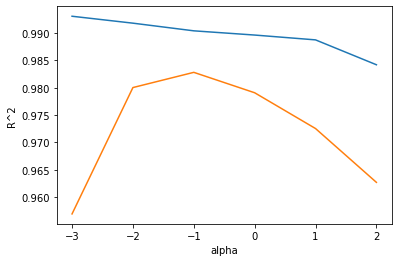

In [ ]:
# 적절한 alpha 값을 찾는 R 제곱 값의 그래프 그려보기
import matplotlib.pyplot as plt

train_score = []
test_score = []

# alpha 값을 0.001에서 100까지 10배씩 늘려가며 릿지 회귀 모델을 훈련한 다음 훈련세트와 테스트 세트의 점수를 파이썬 리스트에 저장
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  #릿지 모델을 만듭니다.
  ridge = Ridge(alpha=alpha)
  #릿지 모델을 훈련합니다.
  ridge.fit(train_scaled, train_target)
  #훈련 점수와 테스트 점수를 저장합니다.
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

# 그래프 그려보기, 10의 자리수 x축
plt.plot(np.log10(alpha_list), train_score) 
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

# 두 세트의 그래프의 차이가 가장 좁은 10의 자리수가 가장 적합한 alpha값이 됨을 알 수 있음

In [ ]:
# 0.1로 최종 모델 훈련
ridge = Ridge(alpha = 0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570365
0.9827976465386884


In [ ]:
#라쏘 회귀 활용하기
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
# 훈련세트 점수
print(ridge.score(train_scaled, train_target))
# 테스트세트 점수
print(ridge.score(test_scaled, test_target))

0.9903815817570365
0.9827976465386884


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


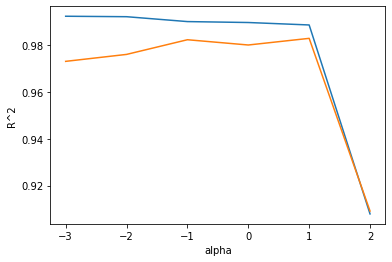

In [ ]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10 ,100]
for alpha in alpha_list:
  lasso = Lasso(alpha = alpha, max_iter=10000)
  lasso.fit(train_scaled, train_target)
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))
  
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [ ]:
# 10로 최종 모델 훈련
lasso = Lasso(alpha = 10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))


0.9888067471131867
0.9824470598706695


In [ ]:
#라쏘 모델의 계수
print(np.sum(lasso.coef_ ==0))

40


# 04-1. 로지스틱 회귀

In [ ]:
#데이터 준비하기
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.00000,25.40000,30.00000,11.52000,4.02000
1,Bream,290.00000,26.30000,31.20000,12.48000,4.30560
2,Bream,340.00000,26.50000,31.10000,12.37780,4.69610
3,Bream,363.00000,29.00000,33.50000,12.73000,4.45550
4,Bream,430.00000,29.00000,34.00000,12.44400,5.13400


In [ ]:
# 물고기 종류 파악
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [ ]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()

print(fish_input[ :5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [ ]:
# 타겟 준비
fish_target = fish['Species'].to_numpy()

# 훈련, 테스트세트 분리
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target,
                                                                      random_state = 42)

#StandardScaler 표준화 전처리
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

# K- 최근접 이웃 분류기 확률 예층
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


In [ ]:
# 타깃값을 그대로 사이킷런 모델에 전달하면 순서가 자동으로 알파벳 순으로 매겨짐
# pd.unique(fish['Speices'])로 출력했던 순서와 다름
print(kn.classes_)

# predict로 타깃값 예측
print(kn.predict(test_scaled[:5]))

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [ ]:
import numpy as np
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4))

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [ ]:
#네 번째 샘플의 최근접 이웃의 클래스
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


* 로지스틱 회귀
 * 이름은 회귀지만 분류 모델
 * 선형 회귀와 동일하게 선형 방정식을 학습하는 모델

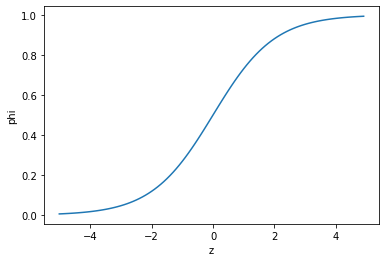

In [ ]:
# 시그모이드 함수 그래프 그려보기
import numpy as np
import matplotlib.pyplot as plt

z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

In [ ]:
#로지스틱 회귀로 이진 분류 수행하기

# 불리언 인덱싱
char_arr = np.array(['A', 'B', 'C', 'D' ,'E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


In [ ]:
# 도미와 빙어 행만 골라내기
bream_smelt_indexes = (train_target == 'Bream') | (train_target =='Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [ ]:
#로지스틱 회귀모형 만들기
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)

#처음 5개 샘플 예측
print(lr.predict(train_bream_smelt[:5]))

#처음 5개 샘플 확률값
print(lr.predict_proba(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']
[[9.54195648e-01 1.03673277e-02 1.15540960e-02 2.12167446e-03
  4.33148683e-03 3.28487747e-07 1.74294382e-02]
 [1.07544137e-04 4.64548705e-02 1.04938313e-01 9.20665662e-04
  6.09721762e-02 7.86102242e-01 5.04188246e-04]
 [9.46817432e-01 1.97424779e-02 8.44232031e-03 4.63952871e-03
  6.62628694e-03 1.71874116e-06 1.37302354e-02]
 [8.82851828e-01 5.88133969e-02 1.59033676e-02 5.67772057e-03
  1.87314649e-02 1.45293479e-05 1.80076924e-02]
 [9.66298200e-01 9.13852180e-03 6.42542902e-03 2.47715824e-03
  3.20088213e-03 2.88855399e-07 1.24595197e-02]]


In [ ]:
#사이킷런은 알파벳으로 정렬! 
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [ ]:
# 로지스틱 회귀가 학습한 계수 확인
print(lr.coef_, lr.intercept_)

[[-1.48635407e-01 -8.16338300e-02  6.40677025e-01  2.81886254e+00
  -3.23791215e-01]
 [-3.35559709e-01 -8.21454187e-01 -8.35625183e-01  1.91834624e+00
  -8.55673174e-01]
 [ 1.30777936e+00  3.20627792e-01 -1.31830404e+00 -1.71471286e+00
   1.64054397e+00]
 [ 1.33816721e-03  1.72779398e+00  1.75766272e+00 -1.28638162e+00
  -6.35345781e-01]
 [-8.14258430e-01 -5.24809489e-01  3.53859503e-01 -4.21963234e-01
   6.26572878e-01]
 [-3.55031912e-01 -6.41091506e-01 -6.57484132e-01 -1.46560568e+00
  -1.51685481e+00]
 [ 3.44367925e-01  2.05672435e-02  5.92141133e-02  1.51454608e-01
   1.06454813e+00]] [ 0.38862776 -0.11439729  2.40795555  0.04859162  1.15910169 -3.78185807
 -0.10802126]


In [ ]:
#decision_function() 메서드
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[[ 5.61774957  1.09554014  1.20392085 -0.49091354  0.2227917  -9.26413018
   1.61504147]
 [-4.55443118  1.51390408  2.32879545 -2.40723556  1.7858404   4.34250963
  -3.00938281]
 [ 5.18907334  1.3187396   0.46922424 -0.12942016  0.22701166 -8.03019609
   0.95556741]
 [ 4.36172497  1.65293726  0.34509848 -0.68488256  0.50877232 -6.65301709
   0.46936662]
 [ 5.81780482  1.15683098  0.80459574 -0.14855563  0.10775878 -9.205252
   1.46681731]]


In [ ]:
from scipy.special import expit
print(expit(decisions))

[[9.96380342e-01 7.49423529e-01 7.69221546e-01 3.79678384e-01
  5.55468677e-01 9.47541477e-05 8.34110152e-01]
 [1.04109546e-02 8.19639070e-01 9.11233953e-01 8.26226102e-02
  8.56416539e-01 9.87163077e-01 4.70037845e-02]
 [9.94453760e-01 7.88971932e-01 6.15200128e-01 4.67690045e-01
  5.56510437e-01 3.25378473e-04 7.22233451e-01]
 [9.87404311e-01 8.39287635e-01 5.85428471e-01 3.35172438e-01
  6.24518634e-01 1.28846154e-03 6.15233832e-01]
 [9.97034692e-01 7.60756411e-01 6.90956696e-01 4.62929244e-01
  5.26913656e-01 1.00500032e-04 8.12573150e-01]]


In [ ]:
#로지스틱 회귀로 ㄷ아중 분류 수행하기
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [ ]:
print(lr.predict((test_scaled[:5])))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [ ]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [ ]:
#다중 분류의 선형 방정식
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


In [ ]:
#시그모이드 함수와 소프트 맥스 함수
#시그모이드
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [ ]:
from scipy.special import softmax
proba = softmax(decision, axis = 1)
print(np.round(proba,decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


# 04-2. 확률적 경사 하강법


확률적 경사 하강법(Stochastic Gradient Descent)
- 
- 훈련 세트를 한 번 모두 사용하는 과정을 에포크(epoch)라고 부름
- 여러 개씩 꺼내쓰면 '미니 배치 경사 하강법(minibatch gradient descent)'
- 극단적으로 한 번에 꺼내쓰면 '배치 경사 하강법(batch gradient descent)'


손실 함수(loss function)
- 머신러닝 알고리즘에서 얼마나 엉터리인지 측정하는 기준
  - 2진 분류 : 로지스틱 손실 함수(logistic loss function)
  - 다중 분류 : 크로스엔트로피 손실 함수(cross-entropy loss function)
  

In [ ]:
import pandas as pd

fish  = pd.read_csv('http://bit.ly/fish_csv_data')

#Speices 열을 제외한 나머지 5개는 입력 데이터로 사용
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

#train_test_split()함수를 사용하여 훈련세트와 데이터세트 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state = 42)

#표준화 전처리
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)


In [ ]:
#SGDClassifier
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss = 'log', max_iter = 10, random_state = 42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [ ]:
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


In [ ]:
import numpy as np
sc = SGDClassifier(loss='log', random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)


In [ ]:
for _ in range(0, 300):
  sc.partial_fit(train_scaled, train_target, classes = classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

파이썬의 _는 특별한 변수, 나중에 사용하기 않고 그냥 버리는 값을 넣어두는 용도로 사용하는 변수

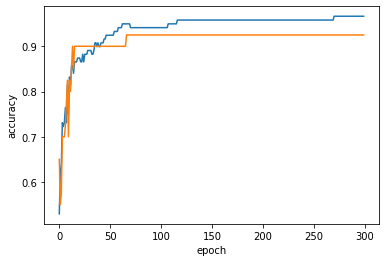

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

## 100번째 epoch가 가장 간격이 좁음

In [ ]:
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


- 힌지 손실, 서포트 벡터 머신
 - 추후 설명

In [ ]:
# 힌지 손실(hinge loss)를 활용한 모델 훈련
sc =  SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925


# 05-1. 결정 트리

In [2]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [3]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [5]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [8]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [10]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split( data,
                                                                      target,
                                                                      test_size = 0.2,
                                                                      random_state=42)

In [12]:
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [13]:
# StandardScaler 전처리
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [15]:
# 로지스틱회귀모형 훈련련
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


In [16]:
#학습계수 및 절편 출력
print(lr.coef_, lr.intercept_)

[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


결정트리<br>
- 사이킷런의 DecisionTreeClassifier
- 결정 트리의 특성값의 스케일은 알고리즘에 영향을 미치지 않음 -> 표준화 전치리가 필요없음
- 어떤 특성이 가장 유용한지 나타내는 특성 중요도를 계산(featuer_importances_ 속성)

In [21]:
# 과대적합
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


plot_tree() 함수
- 사이킷런은 plot_tree() 함수를 사용해 결정 트리를 트리 그림으로 출력 할 수 있음
- 위에서 부터 아래로 거꾸로 자라는 형태
- 맨 위의 노드를 루트 노드(root node), 맨 아래 끝에 달린 노드를 리프 노드(leaf node)라고 함함

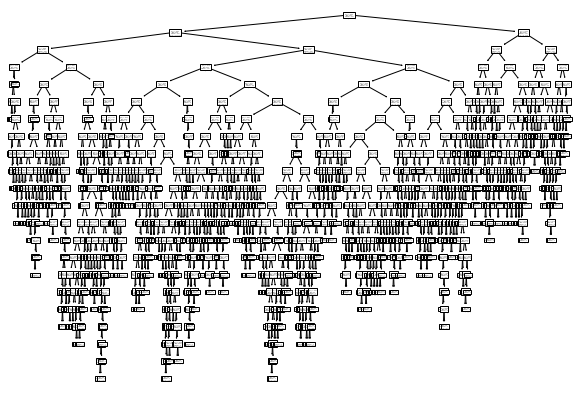

In [22]:
#plot_tree() 함수
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

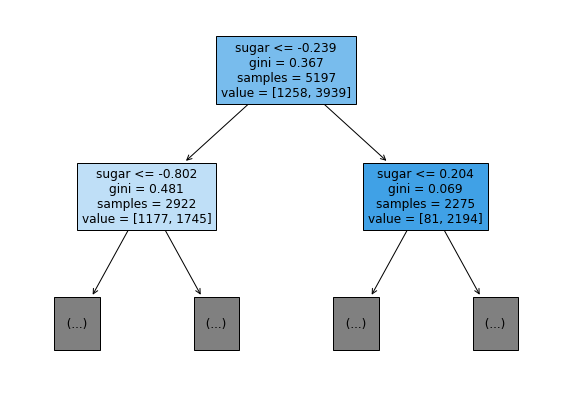

In [24]:
# 함수 트리 깊이를 제한하여 출력하기
# filed =True로 지정하면 클래스마다 색깔을 부여하고 비율이 높아지면 진한색으로 표시함
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar','pH'])
plt.show()

불순도
- 결정트리가 최적의 질문을 찾기 위한 기준
- gini는 지니 불순도(Gini impurity)를 의미함
- DesisionTreeClassifier 클래스의 criterion 매개변수의 기본값

<b>1. 지니불순도<br></b>
$$지니불순도 = 1 - (음성 클래스 비율^2 + 양성 클래스 비율^2)$$
- 100개의 샘플의 노드에서 두 클래스의 비율이 정확히 1/2이면 지니 불순도는 0.5가 됨
-  반면, 노드에 하나의 클래스만 있다면 지니 불순도는 0이 되어 가장 작음(순수 노드)  


- 정보 이득(information gain) - 부모와 자식 노드 사이의 불순도 차이<br>
$$ 부모의 불순도 - (왼쪽 노드 샘플수 / 부모의 샘플 수) \times 왼쪽 노드 불순도 - (오른쪽 노드 샘플 수 / 부모의 샘플 수) \times 오른쪽 노드 불순도 $$
  
<b>2. 엔트로피 불순도</b>
- criterion='entropy'를 지정하여 엔트로피 불순도 사용 가능<br>
$-음성 클래스 비율 \times $$log_{2}{(음성클래스 비율)}$$ - 양성 클래스 비율 \times $$log_{2}{(양성클래스 비율)}$$ $

가지치기
- 과대적합을 최소화하여 일반화하기 위해서는 가지치기가 필요함
- 트리의 최대 깊이를 지정하는 방법을 사용함(max_depth)

In [27]:
# 루트 노드 아래로 최대 3개의 노드까지만 성장하도록 설정
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


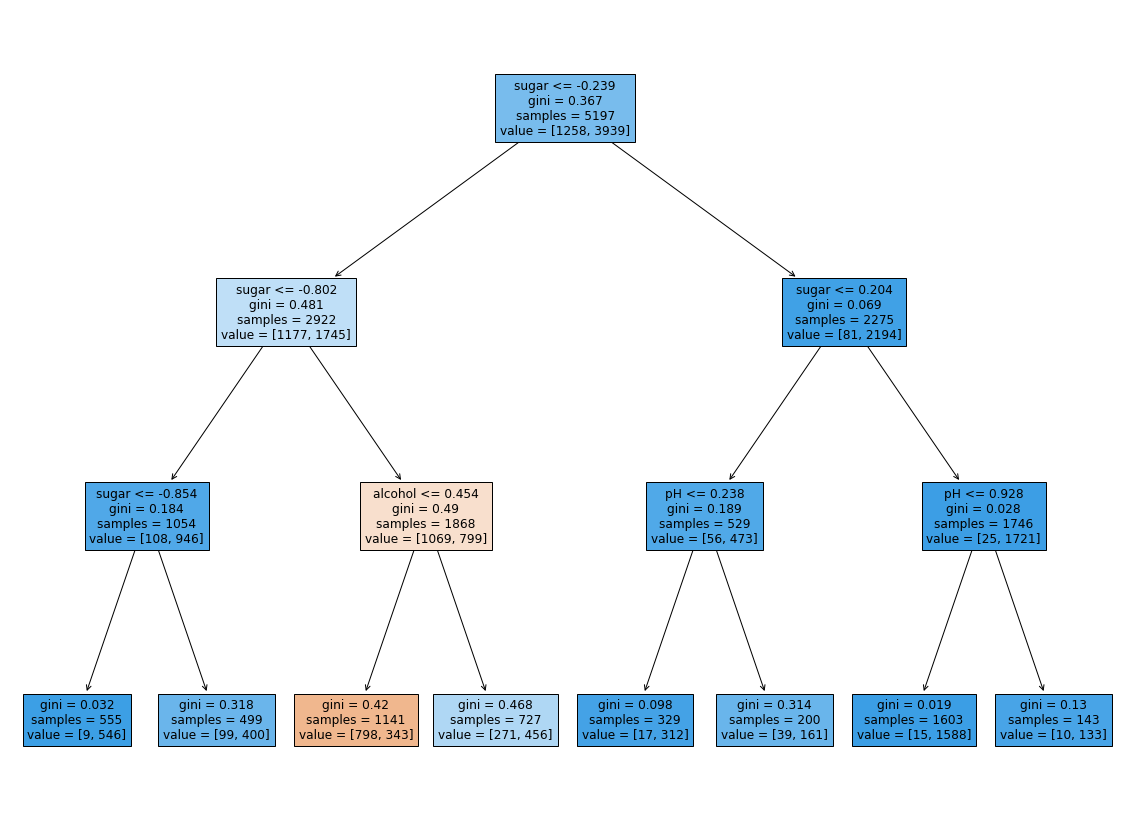

In [29]:
# plot_tree()로 그래프 그려보기
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [31]:
#표준화 하기 전 input 데이터로 훈련련
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


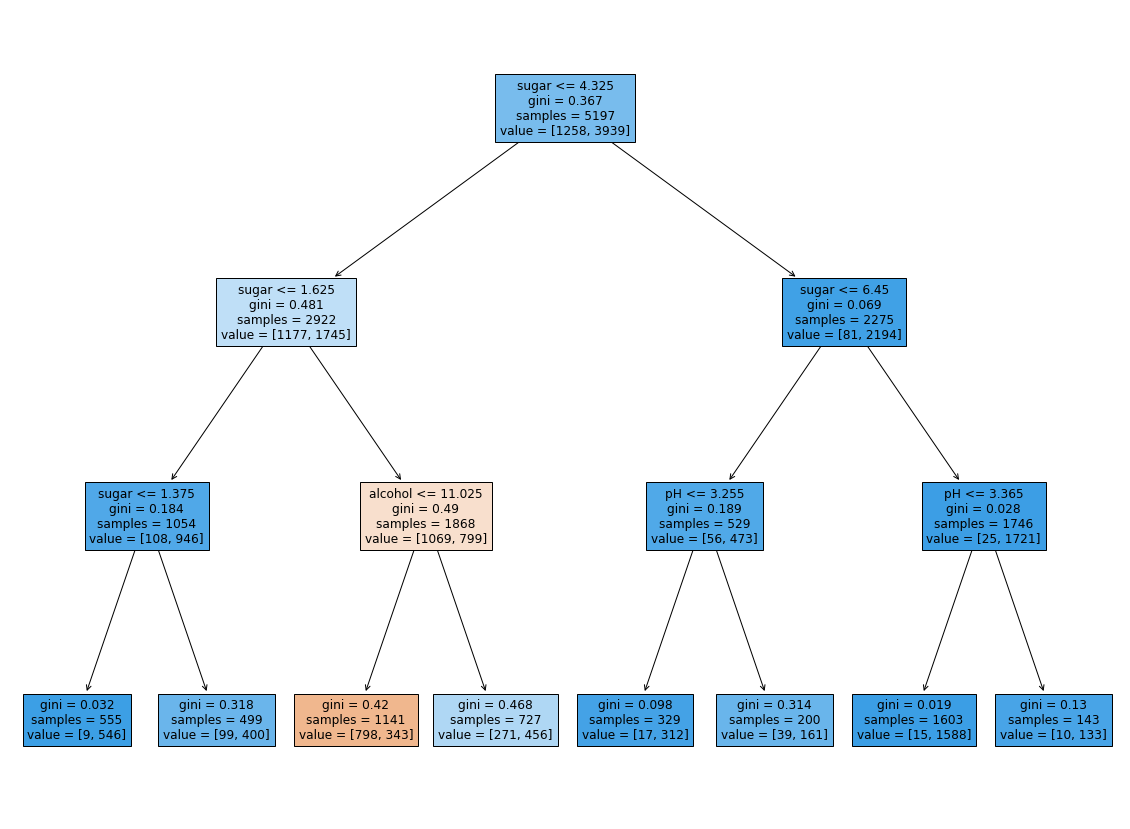

In [32]:
# plot_tree()로 그래프 그려보기
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [33]:
#특정 중요도 확인하기
#특성의 합은 1
print(dt.feature_importances_)

[0.12345626 0.86862934 0.0079144 ]
